In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Kajal\Downloads\Fraud_check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df = data.copy()

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
data.shape

(600, 6)

In [7]:
#creating x and y datasets

In [8]:
x=df.drop(['Taxable.Income'],axis=1)

In [9]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [10]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [11]:
#transforming string data types to numeric

In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])

In [14]:
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])

In [15]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [16]:
y = data[['Taxable.Income']]

In [17]:
y.head()

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [18]:
y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]

C:\Users\Kajal\AppData\Local\Temp\ipykernel_94700\1884946617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['tax']=['risky' if x<=30000 else 'good' for x in y['Taxable.Income']]


In [19]:
y= y.drop(['Taxable.Income'],axis=1)
y.head(100)

,tax
0,good
1,good
2,good
3,good
4,good
...,...
95,good
96,risky
97,good
98,risky


In [20]:
#splitting data into training and testing data set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=40)


In [23]:
#building decision tree model


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [25]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

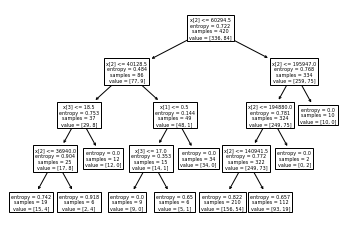

In [26]:
tree.plot_tree(model);

In [27]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [28]:
y.columns

Index(['tax'], dtype='object')

In [29]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']

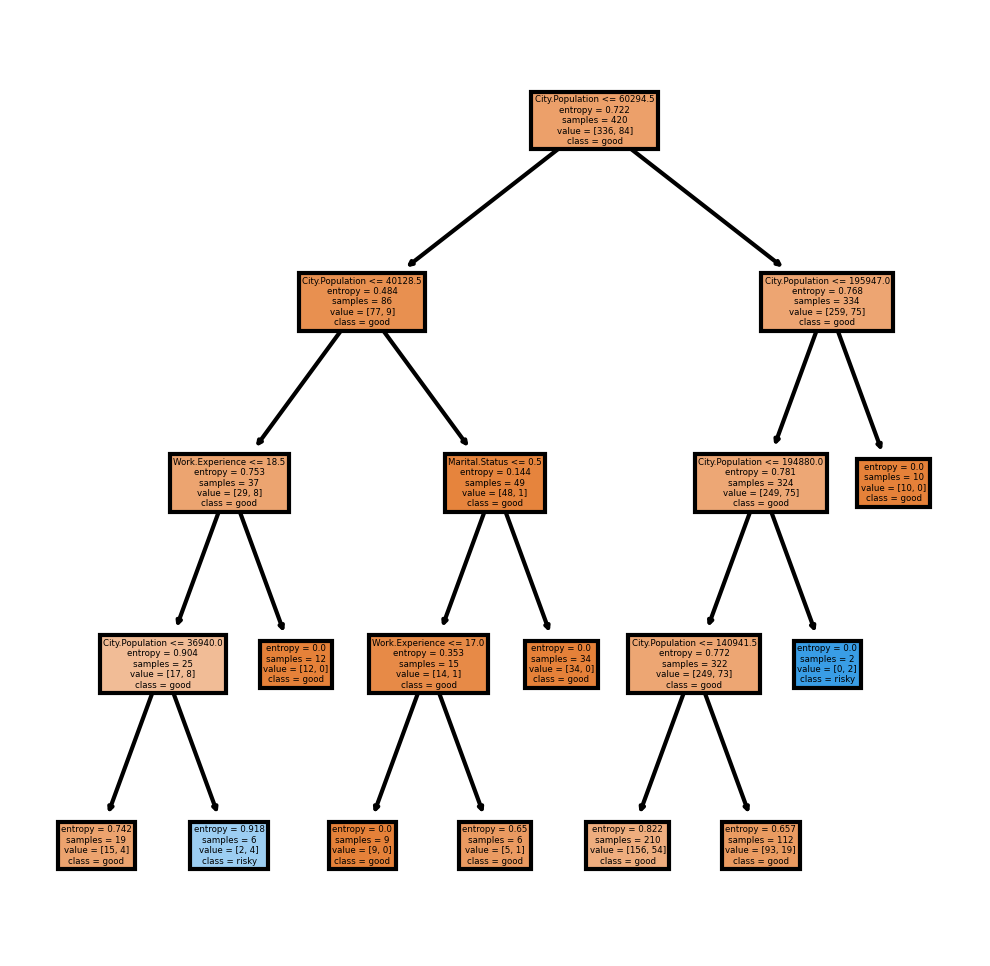

In [30]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

## predicting on test data

In [31]:
pred = model.predict(x_test)

In [32]:
pred

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'risky', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
    

In [33]:
pd.Series(pred).value_counts()

good     177
risky      3
dtype: int64

In [34]:
from sklearn.metrics import classification_report

In [35]:
model.score(x_test,y_test)

0.7611111111111111

In [40]:
columns = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']


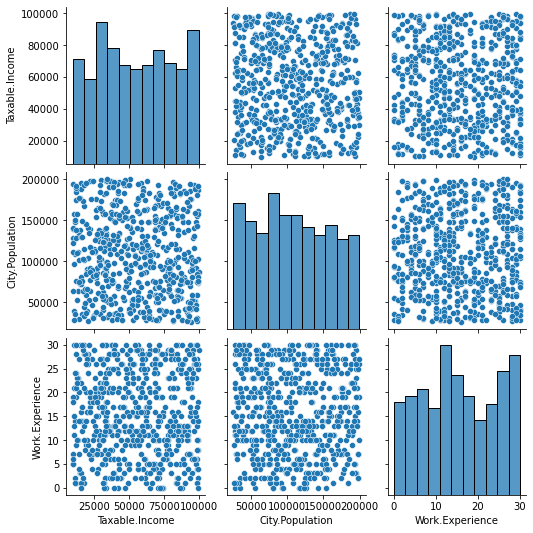

In [41]:
import seaborn as sns
sns.pairplot(df[columns])
plt.show()


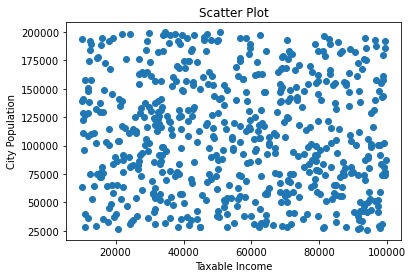

In [42]:
# Creating scatter plot
plt.scatter(df['Taxable.Income'], df['City.Population'])
plt.xlabel('Taxable Income')
plt.ylabel('City Population')
plt.title('Scatter Plot')
plt.show()


C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


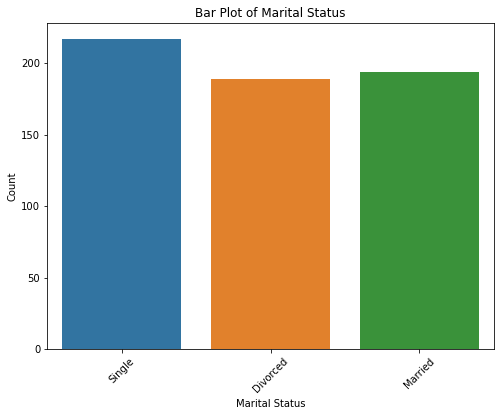

In [43]:
# Creating bar plot
plt.figure(figsize=(8, 6))
sns.countplot(df['Marital.Status'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Bar Plot of Marital Status')
plt.xticks(rotation=45)
plt.show()